In [26]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

In [6]:
df = pd.read_csv("spam.csv", encoding="ISO-8859-1")

In [7]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [10]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.columns = ["labels", "data"]

In [12]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<AxesSubplot:>

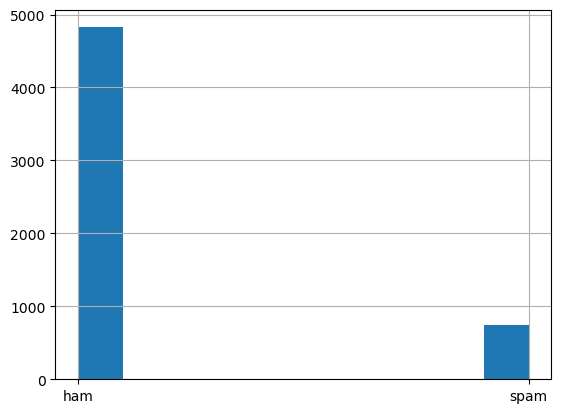

In [13]:
df["labels"].hist()

In [14]:
df["b_labels"] = df["labels"].map({"ham": 0, "spam": 1})
Y = df["b_labels"].to_numpy()

In [15]:
df_train, df_test, Ytrain, Ytest = train_test_split(df["data"], Y, test_size=0.33)

In [60]:
featurizer = CountVectorizer(decode_error="ignore")
# featurizer = TfidfVectorizer(decode_error="ignore")
Xtrain = featurizer.fit_transform(df_train)
Xtest = featurizer.transform(df_test)

In [61]:
Xtrain

<3733x6936 sparse matrix of type '<class 'numpy.int64'>'
	with 49160 stored elements in Compressed Sparse Row format>

In [62]:
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print(f"train accuracy: {model.score(Xtrain, Ytrain)}")
print(f"test accuracy: {model.score(Xtest, Ytest)}")

train accuracy: 0.994374497723011
test accuracy: 0.988036976617727


In [63]:
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)
print(f"train f1 score: {f1_score(Ytrain, Ptrain)}")
print(f"test f1 score: {f1_score(Ytest, Ptest)}")

train f1 score: 0.9786368260427263
test f1 score: 0.9554655870445344


In [64]:
prob_train = model.predict_proba(Xtrain)[:, 1]
prob_test = model.predict_proba(Xtest)[:, 1]
print(f"train roc-auc score {roc_auc_score(Ytrain, prob_train)}")
print(f"test roc-auc score {roc_auc_score(Ytest, prob_test)}")

train roc-auc score 0.9918522110962923
test roc-auc score 0.9861946677698638


In [65]:
cm = confusion_matrix(Ytrain, Ptrain)
cm

array([[3231,    8],
       [  13,  481]], dtype=int64)

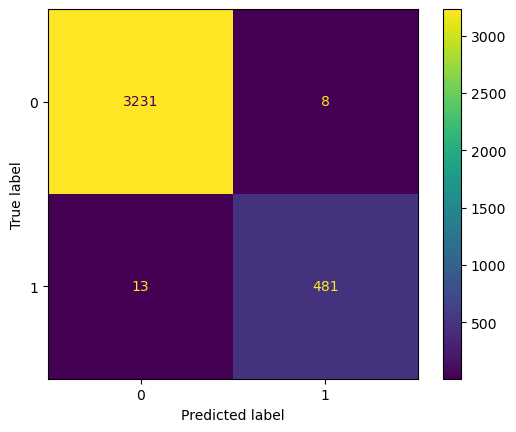

In [66]:
ConfusionMatrixDisplay.from_predictions(Ytrain, Ptrain);

In [67]:
def visualize(label):
    words = ""
    for msg in df[df["labels"] == label]["data"]:
        msg = msg.lower()
        words += msg + " "
    wordcloud = WordCloud(width=600, height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

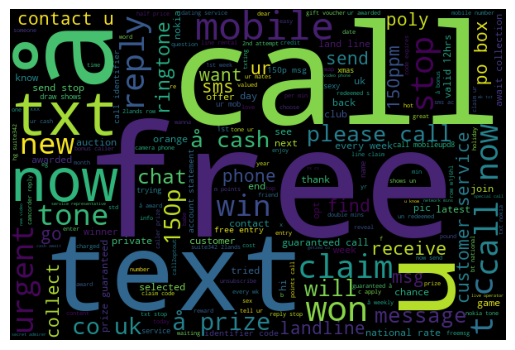

In [68]:
visualize("spam")

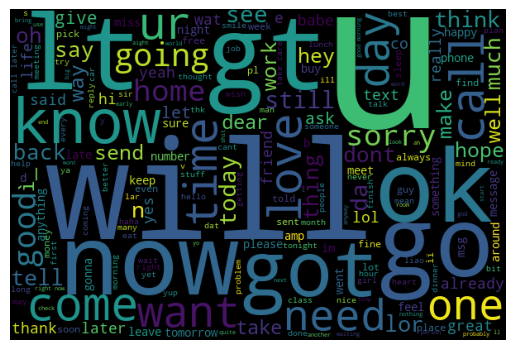

In [69]:
visualize("ham")

In [70]:
X = featurizer.transform(df["data"])
df["predictions"] = model.predict(X)

In [71]:
sneaky_spam = df[(df["predictions"] == 1 & (df["b_labels"] == 0))]["data"]
for msg in sneaky_spam:
    print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
Waiting for your call.
Hi I'm sue. I am 20 years old and work as a lapdancer. I love sex. Text me live - I'm i my bedroom now. text SUE to 89555. By TextOperator G2 1DA 150ppmsg 18+
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Ever thought about living a good life with a perfect partner? Just txt back NAME and AGE to join the mobile community. (100p/SMS)
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
26th OF JULY
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
Hey...Great deal...Farm tour 9am to 5pm $95/pax, $50 deposit by 16 May
Would you like to see my XXX pics they

In [72]:
not_actually_spam = df[(df["predictions"] == 0 & (df["b_labels"] == 1))]["data"]
for msg in not_actually_spam:
    print(msg)

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...
U dun say so early hor... U c already then say...
Nah I don't think he goes to usf, he lives around here though
FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Even my brother is not like to speak with me. They treat me like aids patent.
As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.
I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.
I HAVE A DATE ON SUNDAY WITH WILL!!
Oh k...i'm watc